<a href="https://colab.research.google.com/github/sp6249sec28/Data_Science/blob/main/DS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#FORECASTING - Predicting something w.r.t time.
#REGRESSION - Predicting one entity w.r.t other.
#FORECASTING - Vegetable prices
#1 Quintal - 100Kgs
#1 Ton - 1000Kgs
#FB PROPHET(Facebook) - Tool/library used her

In [ ]:
#Take the data and create dataframe
import pandas as pd
df = pd.read_html('/content/DailyWiseMarketArrivals.html')[-1]
df

,Date,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),Modal Price (Rs/q)
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800
4187,17/Sep/2022,BANGALORE,13200,1600,2000,1800


In [ ]:
df.shape #4189 rows and 6 cols

(4189, 6)

In [ ]:
df.size

25134

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4189 entries, 0 to 4188
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Date                  4188 non-null   object
 1   Market                4189 non-null   object
 2   Arrival(q)            4189 non-null   int64 
 3   Price Minimum (Rs/q)  4189 non-null   object
 4   Price Maximum (Rs/q)  4189 non-null   object
 5   Modal Price (Rs/q)    4189 non-null   object
dtypes: int64(1), object(5)
memory usage: 196.5+ KB


In [ ]:
#Let us check the null values
df.isnull().sum()

Date                    1
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#let us drop the null value
df = df.dropna()

In [ ]:
df.isnull().sum()

Date                    0
Market                  0
Arrival(q)              0
Price Minimum (Rs/q)    0
Price Maximum (Rs/q)    0
Modal Price (Rs/q)      0
dtype: int64

In [ ]:
#Fb prophet - It only accepts data in form of 2 columns - ds and y
#ds(relation of time) ,y - relation of price
#Let us rename the date column as ds and Modal price column as y
df = df.rename(columns = {'Modal Price (Rs/q)':'y','Date':'ds'})
df

,ds,Market,Arrival(q),Price Minimum (Rs/q),Price Maximum (Rs/q),y
0,01/Jan/2005,BANGALORE,6823,440,580,510
1,03/Jan/2005,BANGALORE,5046,400,560,500
2,05/Jan/2005,BANGALORE,6413,420,560,500
3,06/Jan/2005,BANGALORE,7496,440,550,500
4,07/Jan/2005,BANGALORE,9625,410,460,425
...,...,...,...,...,...,...
4183,04/Jun/2022,BANGALORE,9670,2400,2800,2400
4184,08/Jul/2022,BANGALORE,10550,2600,2800,2700
4185,11/Jul/2022,BANGALORE,15870,2600,2800,2700
4186,14/Sep/2022,BANGALORE,9220,1600,2000,1800


In [ ]:
#Now let us create a new dataframe and consider only ds and y column from the old df
df1 = df[['ds','y']]
df1

,ds,y
0,01/Jan/2005,510
1,03/Jan/2005,500
2,05/Jan/2005,500
3,06/Jan/2005,500
4,07/Jan/2005,425
...,...,...
4183,04/Jun/2022,2400
4184,08/Jul/2022,2700
4185,11/Jul/2022,2700
4186,14/Sep/2022,1800


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      4188 non-null   object
 1   y       4188 non-null   object
dtypes: object(2)
memory usage: 98.2+ KB


In [ ]:
#The datatype of both ds and y columns are in object/string format
#Now let us convert the datatype of ds column into datetime format
#And let us convert the datatype of y column into integer format
df1['ds'] = pd.to_datetime(df1['ds'])
df1['y'] = df1['y'].astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4188 entries, 0 to 4187
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      4188 non-null   datetime64[ns]
 1   y       4188 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 98.2 KB


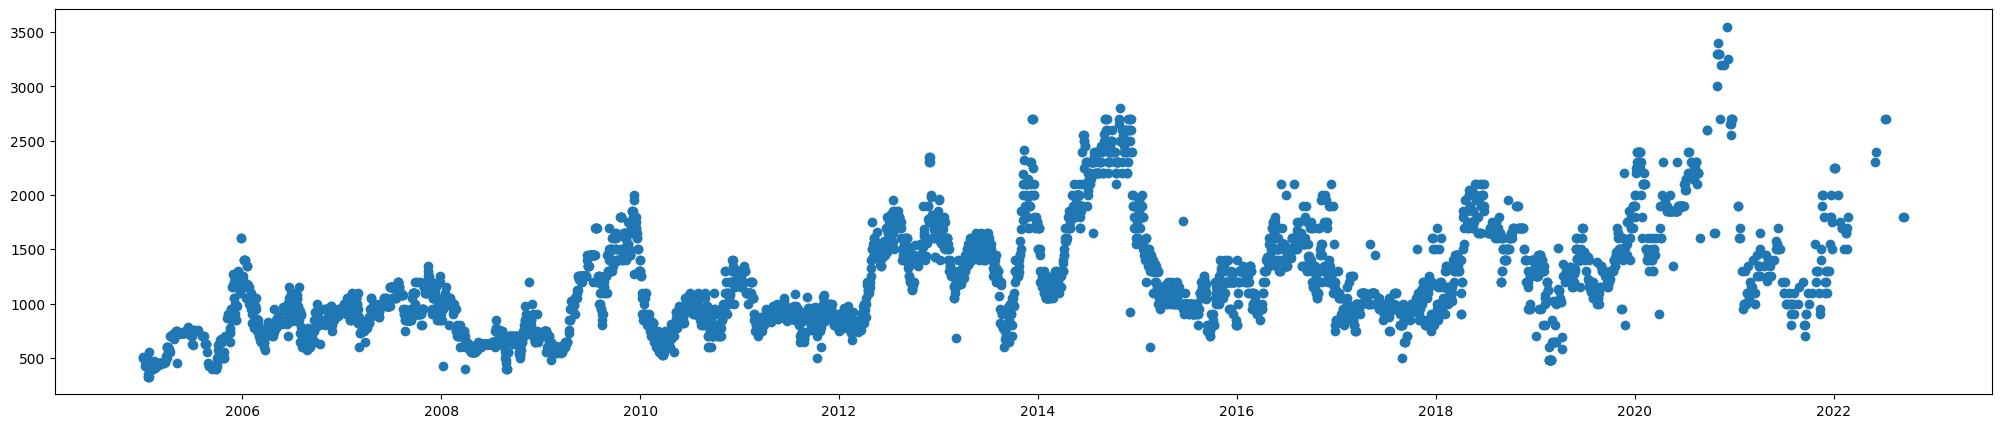

In [ ]:
#VISUALISATION
import matplotlib.pyplot as plt
plt.figure(figsize = (25,5))
plt.scatter(df1['ds'],df1['y'])

In [ ]:
#FBPROPHET
import prophet
op = prophet.Prophet()
op.fit(df1) #We are plotting the values of df1 in fb prophet

In [ ]:
forecast = op.make_future_dataframe(periods = 1000,freq = 'D')
forecast = op.predict(forecast)

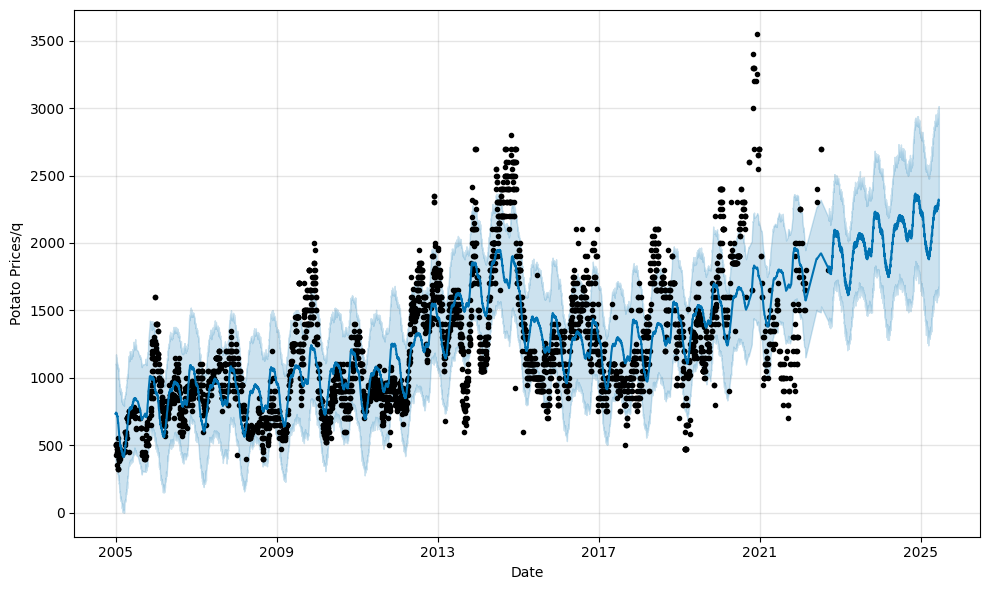

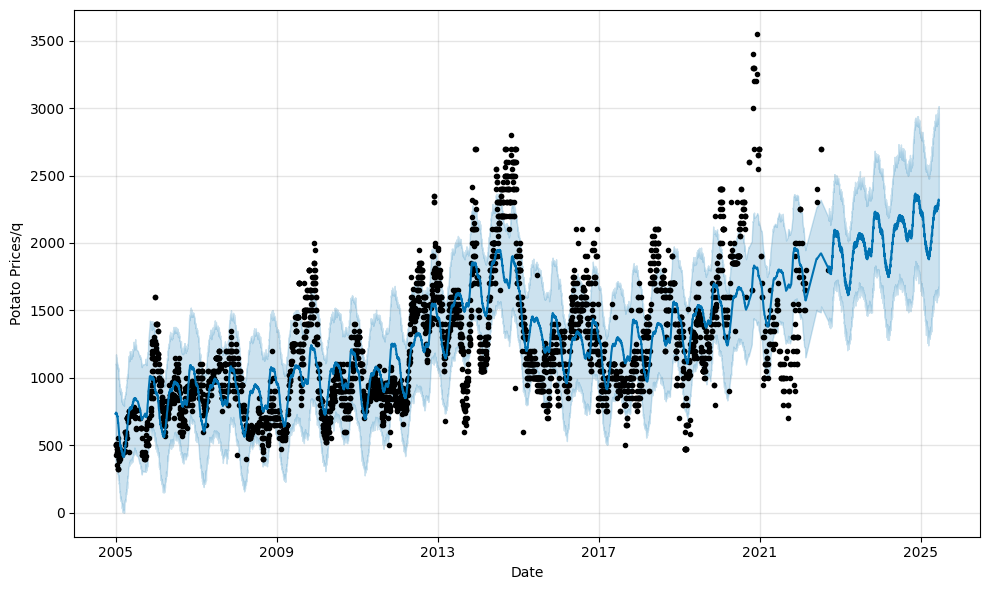

In [ ]:
op.plot(forecast,xlabel = 'Date',ylabel = 'Potato Prices/q')
#The black dots - We are Actual values of Potato Prices from 1st Jan 2005 to 17th Sep 2022
#The light blue shade - It is min and max value of potato prices as predicted by our model
#The dark blue line - BEST FIT LINE.